## Машинное обучение 

### Факультет математики НИУ ВШЭ, 2019-20 учебный год

_Илья Щуров, Соня Дымченко, Руслан Хайдуров, Александр Каган, Павел Балтабаев_

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_на_матфаке_2020)


## Домашнее задание 4. Линейные модели и градиентный спуск.

В данном задании необходимо реализовать обучение логистической и линейной регрессий с помощью различных вариантов градиентного спуска.

Правила оценивания найдите на странице курса.

## Часть 1: Реализация градиентного спуска.

Реализуйте логистическую регрессию с лог-лоссом, обучаемую с помощью:

**Задание 1 (1 балл)** Градиентного спуска;

**Задание 2 (1.5 балла)** Стохастического градиентного спуска;

**Задание 3 (1.5 балла)** Стохастического градиентного спуска с Momentum.

Подробнее о методах можно прочитать [тут](https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture02-linregr.pdf). Напомним, что лог-лосс вычисляется по формуле
$$
    \mathcal{L}(y, X, w) = -\cfrac{1}{n} \sum_{i=1}^{n} [y_i=1]\log \sigma(\langle w, x_i\rangle) + [y_i=0]\log (1 - \sigma(\langle w, x_i\rangle)) + \lambda_2 ||w||_2^2 + \lambda_1 ||w||_1
$$
где $\sigma(x) = 1 / (1 + \exp(-x))$, а $\lambda_1, \lambda_2 > 0$ -- параметры регуляризации. Считайте, что либо $\lambda_1 = 0$, либо $\lambda_2 = 0$. 

Во всех пунктах необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускается использовать только для итераций градиентного спуска в методе fit; также разрешается использовать только стандартные средства языка Python и библиотеку numpy.
* Обучение необходимо приостанавливать, если выполнено хотя бы одно из двух условий:

    * проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, задаваемого параметром `tolerance`);
    * достижение максимального числа итераций (например, 10000, задаваемого параметром `max_iter`).
* Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут `loss_history` — в нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту);
* Инициализировать веса можно случайным образом или нулевым вектором. 


Ниже приведён шаблон класса, который должен содержать код реализации каждого из методов.

In [1]:
import numpy as np
from sklearn.base import BaseEstimator


class LogReg(BaseEstimator):
    def __init__(self, lambda_1=0.0, lambda_2=1.0, gd_type='stochastic',
                 tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-3, nu=0.0):
        """
        lambda_1: L1 regularization param
        lambda_2: L2 regularization param
        gd_type: 'full', 'stochastic' or 'momentum'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        alpha: learning rate
        nu: param for 'momentum' method of gd. 
            By default is 0, what means it is same is full method until changed
        """
        if lambda_1 * lambda_2 != 0:
            self.lambda_1 = 0
            self.lambda_2 = 0
            raise Exception('Double regularization')
        self.lambda_1 = lambda_1
        self.lambda_2 = lambda_2
        self.gd_type = gd_type
        self.nu = nu
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.w = w0
        self.alpha = alpha
        self.loss_history = []

    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        l, d = X.shape
        if self.w is None:
            self.w = np.random.uniform(0, 1, d)
        if self.gd_type == 'full':
            return self.fit_mode_full(X, y)
        elif self.gd_type == 'stochastic':
            return self.fit_mode_stochastic(X, y)
        elif self.gd_type == 'momentum':
            return self.fit_mode_momentum(X, y)
        else:
            raise Exception('Unknown gd_type')

    def fit_mode_full(self, X, y):
        """
        ....
        :param X: np.array of shape (l, d)
        :param y: np.array of shape (l)
        :return: fitted wieght
        """
        l, d = X.shape
        for i in range(self.max_iter):
            last_w = self.w.copy()
            self.loss_history.append(self.calc_loss(X, y))
            self.w -= self.calc_gradient(X, y)
            if np.linalg.norm(last_w - self.w) <= self.tolerance:
                print('finished at step {} out of {}'.format(i, self.max_iter))
                break
        return self.w

    def fit_mode_stochastic(self, X, y):
        """
        ....
        :param X: np.array of shape (l, d)
        :param y: np.array of shape (l)
        :return: fitted wieght
        """
        l, d = X.shape
        for i in range(self.max_iter):
            last_w = self.w.copy()
            random_select = np.random.randint(0, l-1, d)
            X_calc, y_calc = X[random_select], y[random_select]
            self.loss_history.append(self.calc_loss(X_calc, y_calc))
            self.w -= self.calc_gradient(X_calc, y_calc)
            if np.linalg.norm(last_w - self.w) <= self.tolerance:
                print('finished at step {} out of {}'.format(i, self.max_iter))
                break
        return self.w

    def fit_mode_momentum(self, X, y):
        """
        ....
        :param X: np.array of shape (l, d)
        :param y: np.array of shape (l)
        :return: fitted wieght
        """
        l, d = X.shape
        self.gradient = 0
        for i in range(self.max_iter):
            last_w = self.w.copy()
            self.loss_history.append(self.calc_loss(X, y))
            self.gradient = self.nu * self.gradient + self.calc_gradient(X, y)
            self.w -= self.gradient
            if np.linalg.norm(last_w - self.w) <= self.tolerance:
                print('finished at step {} out of {}'.format(i, self.max_iter))
                break
        return self.w

    def predict_proba(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array of shape (l, 2) where
        first column has probabilities of -1
        second column has probabilities of +1
        """
        if self.w is None:
            raise Exception('Not trained yet')
        return np.array([1 - self.sigma((X @ self.w)), self.sigma(X @ self.w)]).T

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        l, d = X.shape
        reg = self.lambda_1 * np.sign(self.w) + 2 * self.lambda_2 * self.w
        loss = (self.sigma(X @ self.w) - y) @ X
        return self.alpha * (loss / l + reg)

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """
        l, d = X.shape
        reg = self.lambda_1 * np.sum(np.abs(self.w)) + self.lambda_2 * np.sum(np.power(self.w, 2))
        loss = np.sum(np.where(y == 1, np.log(self.sigma(X @ self.w)), np.log(1 - self.sigma(X @ self.w))))
        return - loss / l + reg

    def sigma(self, x):
        """
        :param x: input value or vector 
        :return: sigmoid value or vector
        """
        return 1 / (1 + np.exp(-x))


In [2]:
X = np.array([[-2.2], [-1.4], [-.8], [.2], [.4], [.8], [1.2], [2.2], [2.9], [4.6]])
y = np.array([0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
w = None

full = LogReg(lambda_2=0.1, w0=w, alpha=0.001, max_iter=100000, tolerance=0.00001,
              gd_type='full')
print('Full gd_type')
print('w= ', full.fit(X, y))
print(full.calc_loss(X, y), '\n')

st = LogReg(lambda_2=0.1, w0=w, alpha=0.001, max_iter=100000, tolerance=0.00001,
            gd_type='stochastic')
print('Stochastic gd_type')
print('w= ', st.fit(X, y))
print(st.calc_loss(X, y), '\n')

mm = LogReg(lambda_2=0.1, w0=w, alpha=0.001, max_iter=100000, tolerance=0.00001,
            gd_type='momentum', nu=0.2)
print('Momentum gd_type:')
print('w=', mm.fit(X, y))
print(mm.calc_loss(X, y), '\n')


Full gd_type
finished at step 0 out of 100000
w=  [0.78994526]
0.4491282426608649 

Stochastic gd_type
finished at step 9758 out of 100000
w=  [0.7936469]
0.4491458733393704 

Momentum gd_type:
finished at step 0 out of 100000
w= [0.79118164]
0.4491333011228637 



**Задание 4 (0 баллов)**. 
* Загрузите обучающие данные с соревнования [Porto Seguro](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction);
* Пересэмплируйте её так, чтобы объектов положительного и отрциательного классов было поровну;
* Разбейте выборку на обучающую и тестовую в отношении 7:3.

Ладно, мы сделали это за вас. =)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/portoseguro.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

In [4]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 5000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 5000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

**Задание 5 (1.5 балла)**. Обучите и провалидируйте все три метода из заданий 1-3 на данных из предыдущего пункта, сравните качество между методами по метрике AUC-ROC и F-мере. Исследуйте влияние параметров `max_iter` и `eta` (`max_iter`, `alpha` и `eta` для Momentum) на процесс оптимизации. Согласуется ли оно с вашими ожиданиями? (здесь подразумеваются графики, на которых отображаются значения метрик в зависимости от значения параметра).

In [5]:
np.random.seed(90300)
w0_full = np.random.uniform(0, 1, X_train.shape[1])
w0_st = np.random.uniform(0, 1, X_train.shape[1])
w0_mm = np.random.uniform(0, 1, X_train.shape[1])

lr_full = LogReg(lambda_1=0.0, lambda_2=0.001, gd_type='full', tolerance=1e-9,
                 max_iter=5000, w0=w0_full, alpha=1e-3, nu=0)
print(lr_full.fit(np.array(X_train), np.array(y_train)))

lr_st = LogReg(lambda_1=0.0, lambda_2=0.01, gd_type='stochastic', tolerance=1e-9,
               max_iter=50000, w0=w0_st, alpha=1e-3, nu=0)
print(lr_st.fit(np.array(X_train), np.array(y_train)))

lr_mm = LogReg(lambda_1=0.0, lambda_2=0.1, gd_type='momentum', tolerance=1e-9,
               max_iter=7500, w0=w0_mm, alpha=5*1e-3, nu=0.25)
print(lr_mm.fit(np.array(X_train), np.array(y_train)))

print('\n!!!Done fitting!!!')


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


[-0.00934611  0.17595091 -0.04096686  0.01852925  0.13492164  0.23155
  0.55729077  0.4758468   0.49513405  0.25204515  0.9782945   0.60996334
  0.30677283  0.81521627 -0.05081612  0.21570841  0.20558131  0.50502245
  0.69525917  0.73235713  0.00342785 -0.10670296  0.39212937  0.15738659
  0.09885626  0.42221374 -0.01535704  0.51704376  0.5904309   0.36099823
  0.27700023 -0.0025364   0.02428818 -0.0441283   0.42754381  0.32297355
  0.06481139  0.00609029  0.66969817  0.65204521  0.10681968  0.0114794
 -0.1957856  -0.07722667 -0.26803326  0.19774176 -0.05221822 -0.03686526
  0.09562444 -0.04305971 -0.04233096  0.44708268  0.57300143  0.41685958
  0.57554096  0.60087123  0.78755668]
[ 1.71117431e-02  2.39723756e-02  1.02467270e-02  6.04874757e-02
  1.11857416e-01  2.97599561e-02  2.24922340e-01  1.78502771e-01
  1.74331021e-01  1.39656342e-01  4.40411873e-02  2.52138743e-01
  3.28716268e-02  2.86543933e-01 -3.30441181e-02  2.29246736e-02
  2.65542080e-01  1.47336525e-01  1.62724615e-02 

In [6]:
from sklearn.metrics import roc_auc_score, f1_score

y_full_pred = np.argmax(lr_full.predict_proba(np.array(X_test)), axis=1)
y_st_pred = np.argmax(lr_st.predict_proba(np.array(X_test)), axis=1)
y_mm_pred = np.argmax(lr_mm.predict_proba(np.array(X_test)), axis=1)

print('AUC-ROC-score for Full= \t', roc_auc_score(y_test, y_full_pred))
print('AUC-ROC-score for Stochastic= \t', roc_auc_score(y_test, y_st_pred))
print('AUC-ROC-score for Momentum= \t', roc_auc_score(y_test, y_mm_pred))

print('\n')

print('F1-score for Full= \t\t', f1_score(y_test, y_full_pred))
print('F1-score for Stochastic= \t', f1_score(y_test, y_st_pred))
print('F1-score for Momentum= \t\t', f1_score(y_test, y_mm_pred))


AUC-ROC-score for Full= 	 0.5250569415329142
AUC-ROC-score for Stochastic= 	 0.5589191510244141
AUC-ROC-score for Momentum= 	 0.5012281768574675


F1-score for Full= 		 0.5388601036269429
F1-score for Stochastic= 	 0.6452657135149716
F1-score for Momentum= 		 0.6684599865501009


Поскольку малые изменения (в переделах порядка) не сильно влияют на значения, а также нас интересует большой диапазон, то мы будем строить наши зависимости на логарифмической шкале.

In [7]:
import matplotlib.pyplot as plt  # для графиков

plt.ioff()


def pplot_log(x_plot, y_plot, label_plot='', title='', xlabel='', ylabel='', scale='log'):
    plt.figure(figsize=(17, 5))
    plt.plot(x_plot, y_plot, label=label_plot, marker='o')
    plt.title(title)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend(loc='best')
    plt.xscale(scale)
    plt.show()


In [10]:
np.random.seed(90300)
w0 = np.random.uniform(0, 1, X_train.shape[1])

def aucroc_f1_calculate_full(alpha, max_iter):
    print(alpha, max_iter)
    lr = LogReg(lambda_1=0.0, lambda_2=0.001, gd_type='full', tolerance=1e-6,
                max_iter=max_iter, w0=w0, alpha=alpha, nu=0)
    lr.fit(np.array(X_train), np.array(y_train))
    y_pred = np.argmax(lr.predict_proba(np.array(X_test)), axis=1)
    return roc_auc_score(y_test, y_pred), f1_score(y_test, y_pred)


def aucroc_f1_calculate_st(alpha, max_iter):
    print(alpha, max_iter)
    lr = LogReg(lambda_1=0.0, lambda_2=0.001, gd_type='stochastic', tolerance=1e-9,
                max_iter=max_iter, w0=w0, alpha=alpha, nu=0)
    lr.fit(np.array(X_train), np.array(y_train))
    y_pred = np.argmax(lr.predict_proba(np.array(X_test)), axis=1)
    return roc_auc_score(y_test, y_pred), f1_score(y_test, y_pred)

def aucroc_f1_calculate_mm(alpha, max_iter, nu):
    print(alpha, max_iter, nu)
    lr = LogReg(lambda_1=0.0, lambda_2=0.001, gd_type='momentum', tolerance=1e-9,
                max_iter=max_iter, w0=w0, alpha=alpha, nu=nu)
    lr.fit(np.array(X_train), np.array(y_train))
    y_pred = np.argmax(lr.predict_proba(np.array(X_test)), axis=1)
    return roc_auc_score(y_test, y_pred), f1_score(y_test, y_pred)


In [11]:
print('## Full gradient method ##')
# --- calculating --- #
logspace_alpha_full = np.logspace(-7, 0, num=14, base=10)
logspace_max_iter_full = np.logspace(0, 5, num=10, base=10).round()

aucroc_f1_alpha_full = np.array(list(map(lambda x: aucroc_f1_calculate_full(x, 1000), logspace_alpha_full)))
print(aucroc_f1_alpha_full, logspace_alpha_full)

aucroc_f1_max_iter_full = np.array(list(map(lambda x: aucroc_f1_calculate_full(1e-2, int(x)), logspace_max_iter_full)))
print(aucroc_f1_max_iter_full, logspace_max_iter_full)


## Full gradient method ##
1e-07 1000


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


3.4551072945922185e-07 1000


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


1.1937766417144358e-06 1000


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


4.124626382901348e-06 1000


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


1.4251026703029963e-05 1000


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


4.9238826317067314e-05 1000


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.00017012542798525892 1000


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.0005878016072274912 1000
0.002030917620904735 1000
0.007017038286703823 1000
0.02424462017082326 1000


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.08376776400682907 1000


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.28942661247167517 1000


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:149: RuntimeWarning: overflow encountered in exp


1.0 1000


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:149: RuntimeWarning: overflow encountered in exp


[[0.5        0.67197875]
 [0.5        0.67197875]
 [0.5        0.67197875]
 [0.5        0.67197875]
 [0.5        0.67197875]
 [0.50816251 0.58747543]
 [0.51135097 0.58451907]
 [0.51987486 0.52786885]
 [0.53176457 0.54385965]
 [0.50678631 0.66787741]
 [0.50271372 0.66651594]
 [0.50403925 0.66757062]
 [0.50097081 0.66681675]
 [0.49814373 0.66800535]] [1.00000000e-07 3.45510729e-07 1.19377664e-06 4.12462638e-06
 1.42510267e-05 4.92388263e-05 1.70125428e-04 5.87801607e-04
 2.03091762e-03 7.01703829e-03 2.42446202e-02 8.37677640e-02
 2.89426612e-01 1.00000000e+00]
0.01 1
0.01 4
0.01 13
0.01 46
0.01 167


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.01 599


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.01 2154


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.01 7743


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.01 27826


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.01 100000


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


[[0.49848111 0.66815443]
 [0.50085879 0.6689038 ]
 [0.50104282 0.66546112]
 [0.52399412 0.64008128]
 [0.54789756 0.49852507]
 [0.56342913 0.54994851]
 [0.56854854 0.5757377 ]
 [0.55870579 0.45158632]
 [0.52477023 0.17326449]
 [0.52412747 0.16925734]] [1.0000e+00 4.0000e+00 1.3000e+01 4.6000e+01 1.6700e+02 5.9900e+02
 2.1540e+03 7.7430e+03 2.7826e+04 1.0000e+05]


## Full gradient method ##


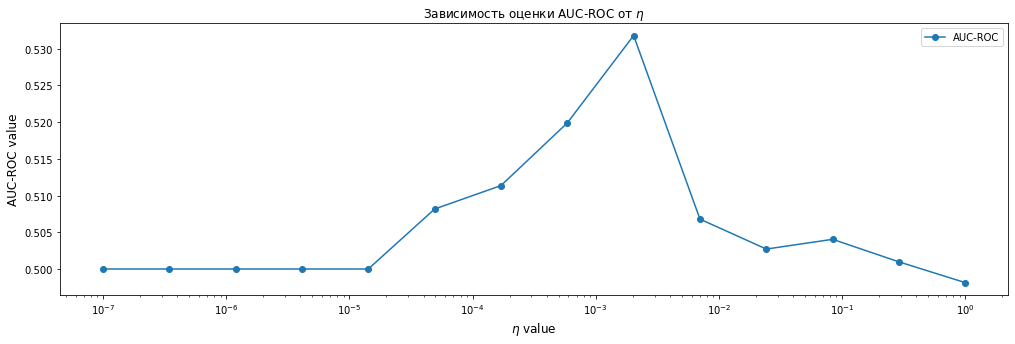

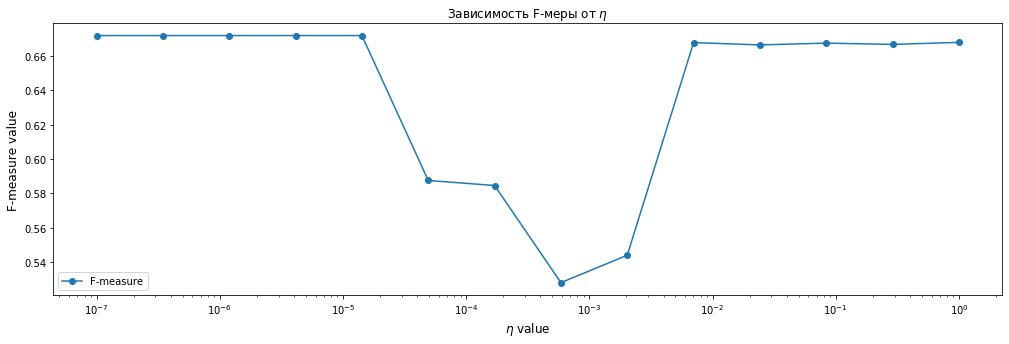

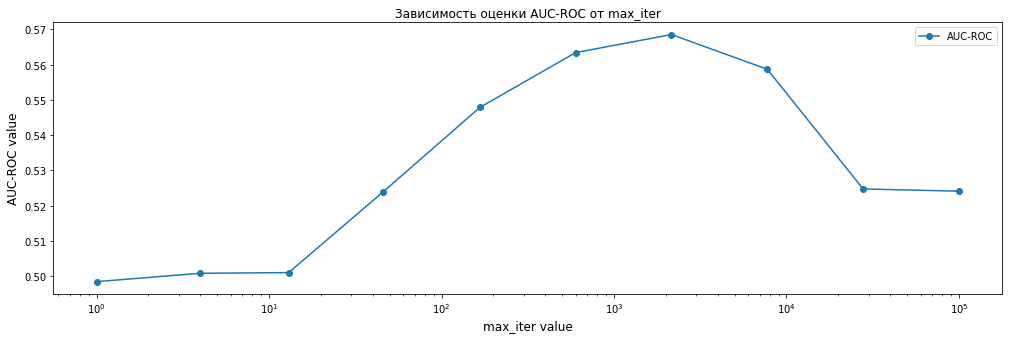

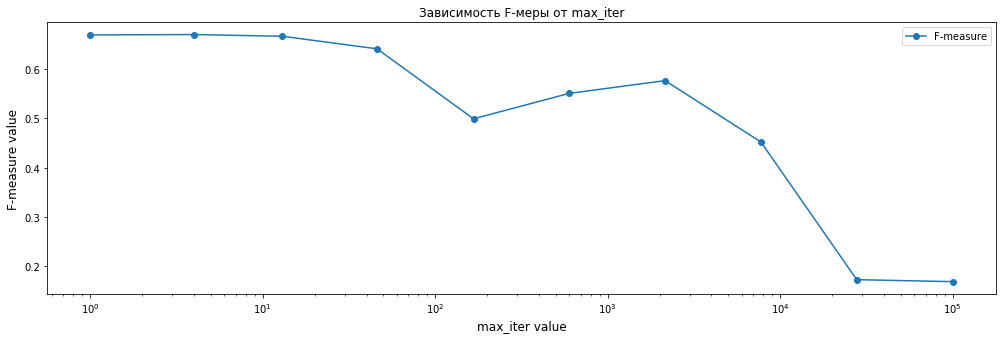

In [12]:
print('## Full gradient method ##')
# ---  alpha change --- #
pplot_log(logspace_alpha_full, aucroc_f1_alpha_full.T[0], label_plot='AUC-ROC',
          title='Зависимость оценки AUC-ROC от $\eta$',
          xlabel='$\eta$ value', ylabel='AUC-ROC value')

pplot_log(logspace_alpha_full, aucroc_f1_alpha_full.T[1], label_plot='F-measure',
          title='Зависимость F-меры от $\eta$',
          xlabel='$\eta$ value', ylabel='F-measure value')

# --- max_iter change --- # 
pplot_log(logspace_max_iter_full, aucroc_f1_max_iter_full.T[0], label_plot='AUC-ROC',
          title='Зависимость оценки AUC-ROC от max_iter',
          xlabel='max_iter value', ylabel='AUC-ROC value')

pplot_log(logspace_max_iter_full, aucroc_f1_max_iter_full.T[1], label_plot='F-measure',
          title='Зависимость F-меры от max_iter',
          xlabel='max_iter value', ylabel='F-measure value')


In [13]:
print('## Stochastic gradient method ##')
# --- calculating --- #
logspace_alpha_st = np.logspace(-8, 1, num=14, base=10)
logspace_max_iter_st = np.logspace(1, 6, num=12, base=10).round()

aucroc_f1_alpha_st = np.array(list(map(lambda x: aucroc_f1_calculate_st(x, 10000), logspace_alpha_st)))
print(aucroc_f1_alpha_st, logspace_alpha_st)

aucroc_f1_max_iter_st = np.array(list(map(lambda x: aucroc_f1_calculate_st(5*1e-3, int(x)), logspace_max_iter_st)))
print(aucroc_f1_max_iter_st, logspace_max_iter_st)


## Stochastic gradient method ##
1e-08 10000
4.9238826317067414e-08 10000
2.424462017082331e-07 10000
1.1937766417144358e-06 10000
5.878016072274912e-06 10000
2.8942661247167517e-05 10000
0.00014251026703029964 10000
0.0007017038286703822 10000
0.003455107294592218 10000
0.017012542798525893 10000


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.08376776400682924 10000


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.4124626382901348 10000


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:149: RuntimeWarning: overflow encountered in exp


2.030917620904731 10000


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:149: RuntimeWarning: overflow encountered in exp
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


10.0 10000


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:149: RuntimeWarning: overflow encountered in exp


[[0.52477023 0.17326449]
 [0.52865079 0.19402143]
 [0.55382508 0.37168142]
 [0.58148107 0.57908847]
 [0.58036491 0.58214404]
 [0.58347469 0.59302704]
 [0.57587493 0.58322412]
 [0.57740848 0.57761492]
 [0.54149131 0.2989899 ]
 [0.51831864 0.13499112]
 [0.50743707 0.66863234]
 [0.50357518 0.0220636 ]
 [0.49967062 0.67168475]
 [0.51138164 0.23088924]] [1.00000000e-08 4.92388263e-08 2.42446202e-07 1.19377664e-06
 5.87801607e-06 2.89426612e-05 1.42510267e-04 7.01703829e-04
 3.45510729e-03 1.70125428e-02 8.37677640e-02 4.12462638e-01
 2.03091762e+00 1.00000000e+01]
0.005 10
0.005 28
0.005 81
0.005 231
0.005 658
0.005

F:\anaconda3\lib\site-packages\ipykernel_launcher.py:149: RuntimeWarning: overflow encountered in exp
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:149: RuntimeWarning: overflow encountered in exp
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:149: RuntimeWarning: overflow encountered in exp
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:149: RuntimeWarning: overflow encountered in exp
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


 1874


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.005 5337


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.005 15199


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.005 43288


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.005 123285
0.005 351119
0.005 1000000
[[0.51059486 0.24167947]
 [0.50652361 0.27361246]
 [0.52903618 0.48695652]
 [0.54399567 0.59332141]
 [0.55437316 0.59079755]
 [0.5747761  0.59683544]
 [0.56395588 0.59161976]
 [0.57276648 0.58395583]
 [0.50765444 0.67102298]
 [0.50866658 0.67147689]
 [0.5125018  0.09981741]
 [0.50796781 0.67161828]] [1.00000e+01 2.80000e+01 8.10000e+01 2.31000e+02 6.58000e+02 1.87400e+03
 5.33700e+03 1.51990e+04 4.32880e+04 1.23285e+05 3.51119e+05 1.00000e+06]


## Stochastic gradient method ##


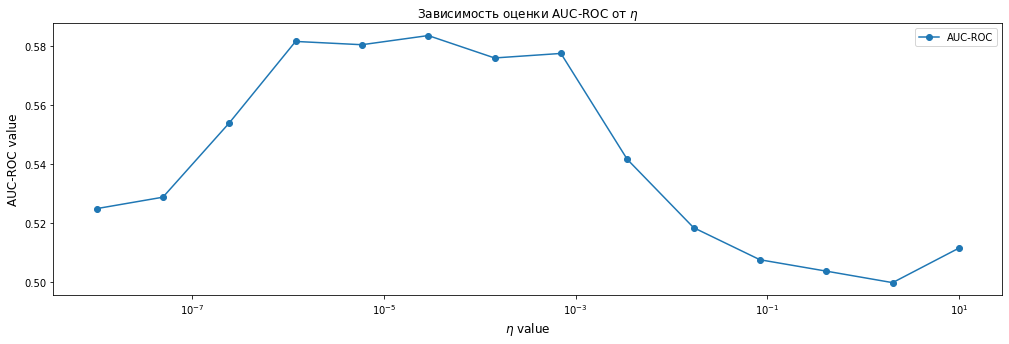

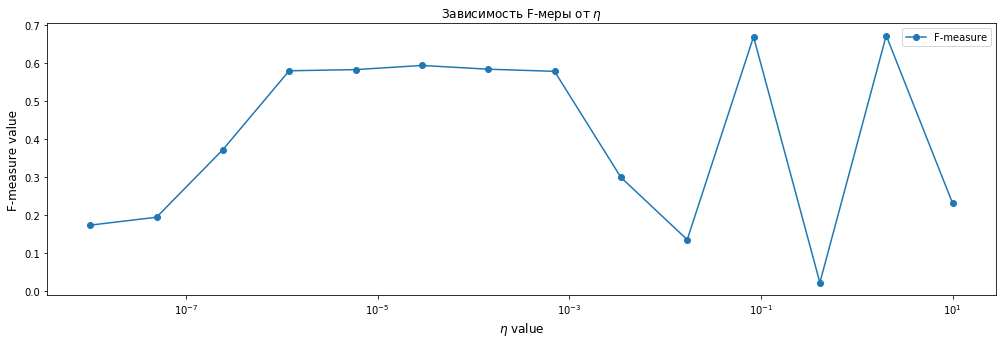

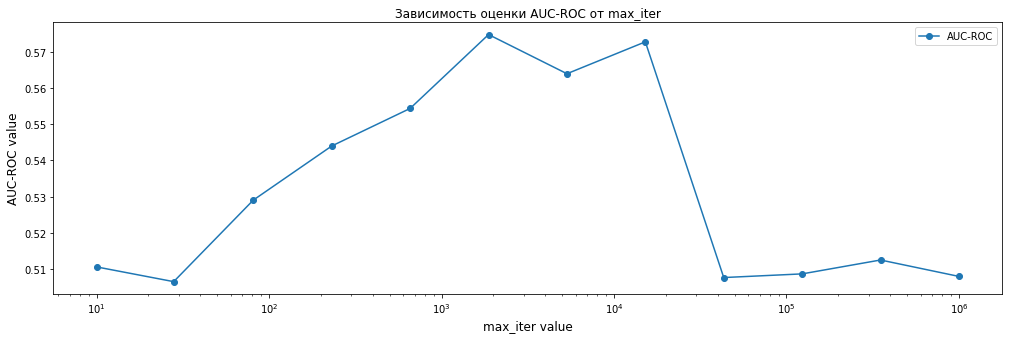

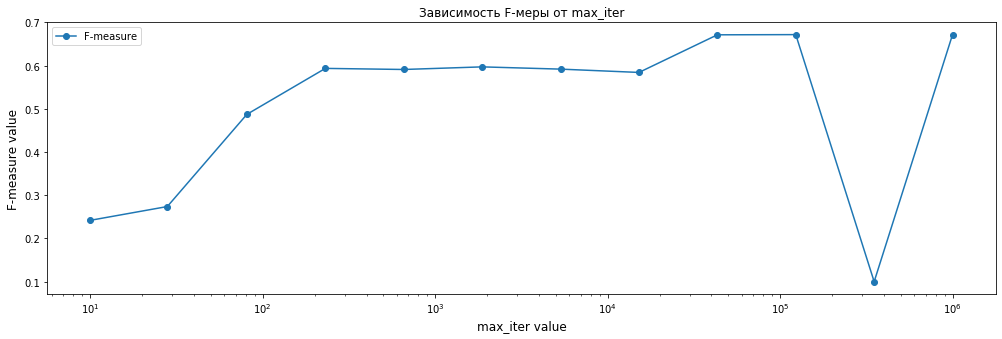

In [14]:
print('## Stochastic gradient method ##')
# ---  alpha change --- #
pplot_log(logspace_alpha_st, aucroc_f1_alpha_st.T[0], label_plot='AUC-ROC',
          title='Зависимость оценки AUC-ROC от $\eta$',
          xlabel='$\eta$ value', ylabel='AUC-ROC value')

pplot_log(logspace_alpha_st, aucroc_f1_alpha_st.T[1], label_plot='F-measure',
          title='Зависимость F-меры от $\eta$',
          xlabel='$\eta$ value', ylabel='F-measure value')

# --- max_iter change --- # 
pplot_log(logspace_max_iter_st, aucroc_f1_max_iter_st.T[0], label_plot='AUC-ROC',
          title='Зависимость оценки AUC-ROC от max_iter',
          xlabel='max_iter value', ylabel='AUC-ROC value')

pplot_log(logspace_max_iter_st, aucroc_f1_max_iter_st.T[1], label_plot='F-measure',
          title='Зависимость F-меры от max_iter',
          xlabel='max_iter value', ylabel='F-measure value')


In [15]:
print('## Momentum gradient method ##')
# --- calculating --- #
logspace_alpha_mm = np.logspace(-8, 1, num=14, base=10)
logspace_max_iter_mm = np.logspace(1, 5, num=12, base=10).round()
logspace_nu_mm = np.linspace(0, 1, num=25)

aucroc_f1_alpha_mm = np.array(list(map(lambda x: aucroc_f1_calculate_mm(x, 5000, 0.25), logspace_alpha_mm)))
print(aucroc_f1_alpha_mm, logspace_alpha_st)

aucroc_f1_max_iter_mm = np.array(list(map(lambda x: aucroc_f1_calculate_mm(5*1e-3, int(x), 0.25), logspace_max_iter_mm)))
print(aucroc_f1_max_iter_mm, logspace_max_iter_st)

aucroc_f1_nu_mm = np.array(list(map(lambda x: aucroc_f1_calculate_mm(5*1e-3, 5000, x), logspace_nu_mm)))
print(aucroc_f1_nu_mm, logspace_nu_mm)

## Momentum gradient method ##
1e-08 5000 0.25
4.9238826317067414e-08 5000 0.25
2.424462017082331e-07 5000 0.25
1.1937766417144358e-06 5000 0.25
5.878016072274912e-06 5000 0.25
2.8942661247167517e-05 5000 0.25
0.00014251026703029964 5000 0.25
0.0007017038286703822 5000 0.25
0.003455107294592218 5000 0.25
0.017012542798525893 5000 0.25


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.08376776400682924 5000 0.25


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.4124626382901348 5000 0.25


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:149: RuntimeWarning: overflow encountered in exp


2.030917620904731 5000 0.25


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:149: RuntimeWarning: overflow encountered in exp


10.0 5000 0.25


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:149: RuntimeWarning: overflow encountered in exp


[[0.50798382 0.67132237]
 [0.5103935  0.67149321]
 [0.52198183 0.66109785]
 [0.58348135 0.5810992 ]
 [0.5824372  0.58163606]
 [0.58341735 0.58333333]
 [0.5823732  0.58385918]
 [0.5823972  0.58302829]
 [0.5154849  0.66666667]
 [0.51199906 0.66727941]
 [0.51931478 0.65918854]
 [0.5150755  0.66789753]
 [0.50000667 0.66546357]
 [0.49967862 0.67153931]] [1.00000000e-08 4.92388263e-08 2.42446202e-07 1.19377664e-06
 5.87801607e-06 2.89426612e-05 1.42510267e-04 7.01703829e-04
 3.45510729e-03 1.70125428e-02 8.37677640e-02 4.12462638e-01
 2.03091762e+00 1.00000000e+01]
0.005 10 0.25
0.005 23 0.25
0.005 53 0.25
0.005 123 0.25


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.005 285 0.25


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:149: RuntimeWarning: overflow encountered in exp


0.005 658 0.25


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:149: RuntimeWarning: overflow encountered in exp
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.005 1520 0.25


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:149: RuntimeWarning: overflow encountered in exp
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.005 3511 0.25


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.005 8111 0.25


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.005 18738 0.25


F:\anaconda3\lib\site-packages\ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


0.005 43288 0.25
0.005 100000 0.25
[[0.49967862 0.67153931]
 [0.49967862 0.67153931]
 [0.49936524 0.67095344]
 [0.49705958 0.66888741]
 [0.50785846 0.6463621 ]
 [0.53289807 0.46499239]
 [0.55268759 0.52808989]
 [0.56666827 0.56953642]
 [0.56824316 0.57443313]
 [0.52481024 0.66666667]
 [0.51581428 0.66697567]
 [0.51613566 0.66743863]] [1.00000e+01 2.80000e+01 8.10000e+01 2.31000e+02 6.58000e+02 1.87400e+03
 5.33700e+03 1.51990e+04 4.32880e+04 1.23285e+05 3.51119e+05 1.00000e+06]
0.005 5000 0.0
0.005 5000 0.041666666666666664
0.005 5000 0.08333333333333333
0.005 5000 0.125
0.005 5000 0.16666666666666666
0.005 5000 0.20833333333333331
0.005 5000 0.25
0.005 5000 0.29166666666666663
0.005 5000 0.3333333333333333
0.005 5000 0.375
0.005 5000 0.41666666666666663
0.005 5000 0.4583333333333333
0.005 5000 0.5
0.005 5000 0.5416666666666666
0.005 5000 0.5833333333333333
0.005 5000 0.625
0.005 5000 0.6666666666666666
0.005 5000 0.7083333333333333
0.005 5000 0.75
0.005 5000 0.7916666666666666
0.005 5

## Momentum gradient method ##


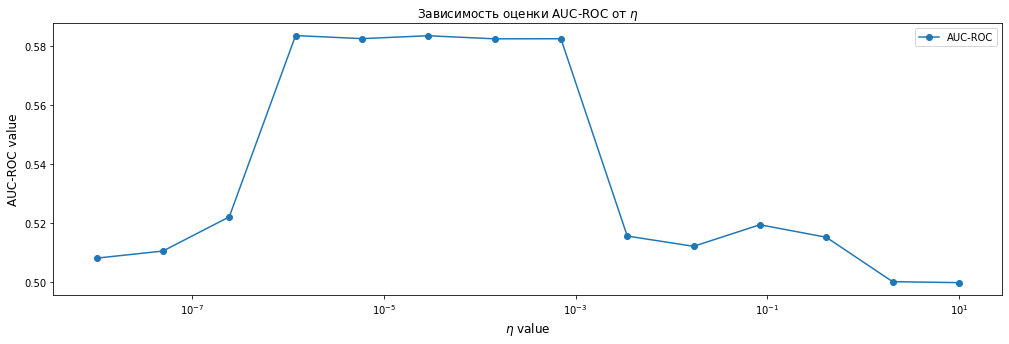

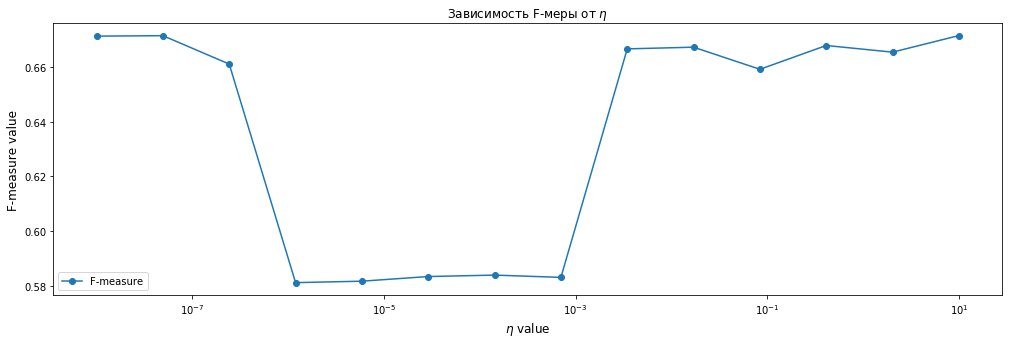

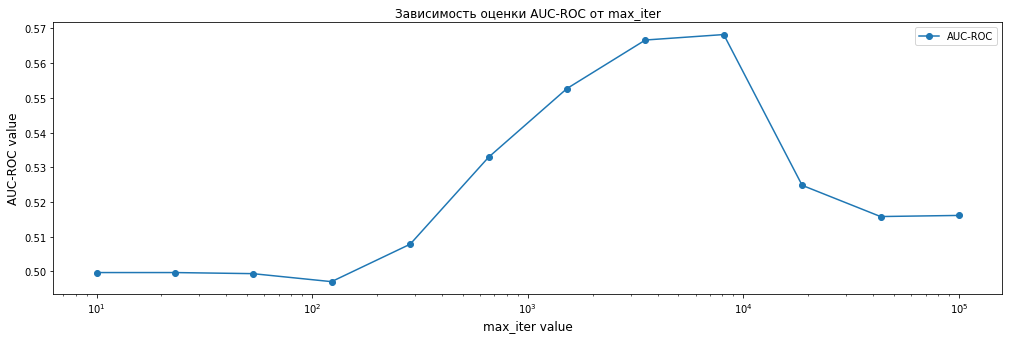

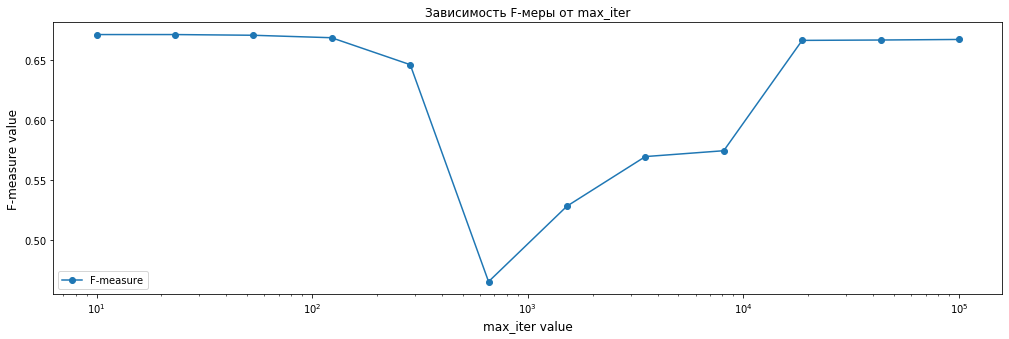

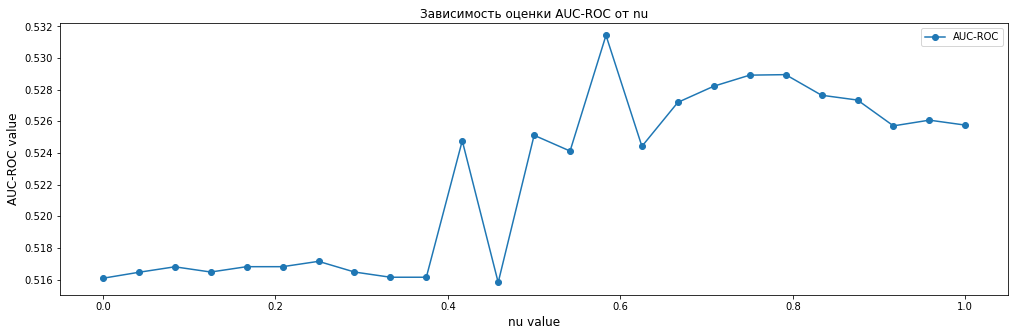

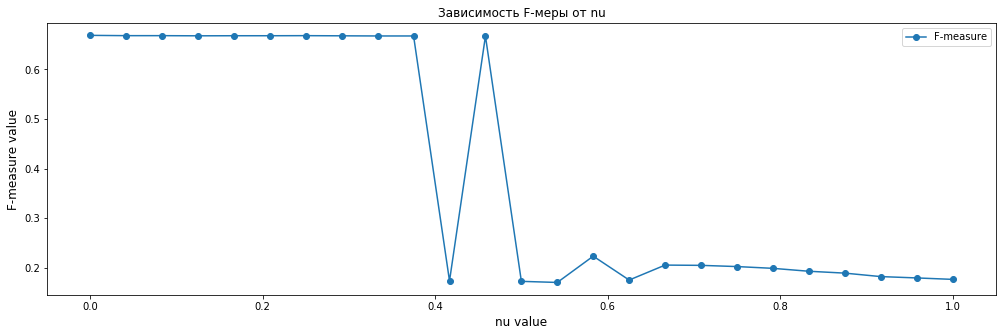

In [16]:
print('## Momentum gradient method ##')
# ---  alpha change --- #
pplot_log(logspace_alpha_mm, aucroc_f1_alpha_mm.T[0], label_plot='AUC-ROC',
          title='Зависимость оценки AUC-ROC от $\eta$',
          xlabel='$\eta$ value', ylabel='AUC-ROC value')

pplot_log(logspace_alpha_mm, aucroc_f1_alpha_mm.T[1], label_plot='F-measure',
          title='Зависимость F-меры от $\eta$',
          xlabel='$\eta$ value', ylabel='F-measure value')

# --- max_iter change --- # 
pplot_log(logspace_max_iter_mm, aucroc_f1_max_iter_mm.T[0], label_plot='AUC-ROC',
          title='Зависимость оценки AUC-ROC от max_iter',
          xlabel='max_iter value', ylabel='AUC-ROC value')

pplot_log(logspace_max_iter_mm, aucroc_f1_max_iter_mm.T[1], label_plot='F-measure',
          title='Зависимость F-меры от max_iter',
          xlabel='max_iter value', ylabel='F-measure value')

# --- max_iter change --- # 
pplot_log(logspace_nu_mm, aucroc_f1_nu_mm.T[0], label_plot='AUC-ROC',
          title='Зависимость оценки AUC-ROC от nu',
          xlabel='nu value', ylabel='AUC-ROC value', scale='linear')

pplot_log(logspace_nu_mm, aucroc_f1_nu_mm.T[1], label_plot='F-measure',
          title='Зависимость F-меры от nu',
          xlabel='nu value', ylabel='F-measure value', scale='linear')

Зависимость оценки AUC-ROC от learing rate для каждого из методов


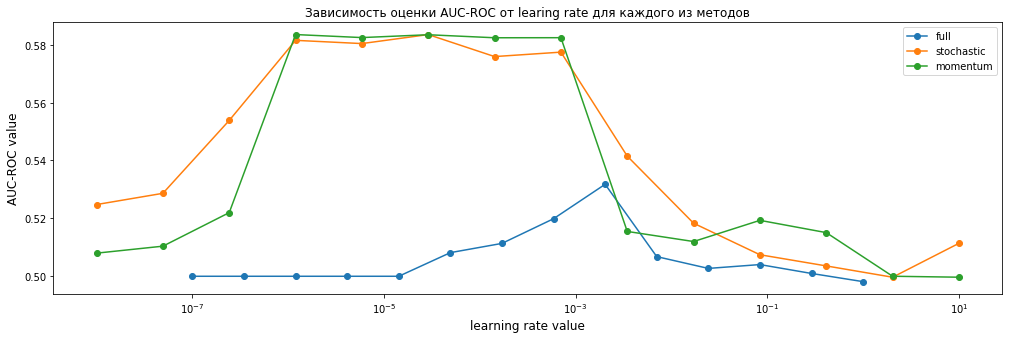

Зависимость оценки F-меры от learing rate для каждого из методов


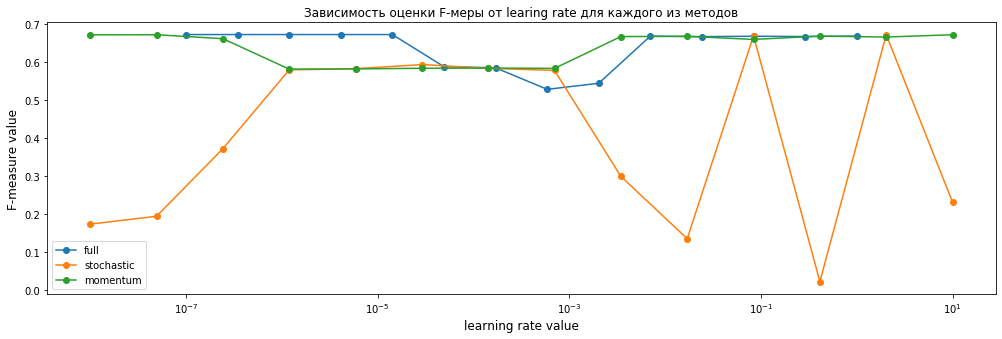

In [17]:
print('Зависимость оценки AUC-ROC от learing rate для каждого из методов')
plt.figure(figsize=(17, 5))
plt.plot(logspace_alpha_full, aucroc_f1_alpha_full.T[0], label='full', marker='o')
plt.plot(logspace_alpha_st, aucroc_f1_alpha_st.T[0], label='stochastic', marker='o')
plt.plot(logspace_alpha_mm, aucroc_f1_alpha_mm.T[0], label='momentum', marker='o')
plt.title('Зависимость оценки AUC-ROC от learing rate для каждого из методов')
plt.xlabel('learning rate value', fontsize=12)
plt.ylabel('AUC-ROC value', fontsize=12)
plt.xscale('log')
plt.legend(loc='best')
plt.show()

print('Зависимость оценки F-меры от learing rate для каждого из методов')
plt.figure(figsize=(17, 5))
plt.plot(logspace_alpha_full, aucroc_f1_alpha_full.T[1], label='full', marker='o')
plt.plot(logspace_alpha_st, aucroc_f1_alpha_st.T[1], label='stochastic', marker='o')
plt.plot(logspace_alpha_mm, aucroc_f1_alpha_mm.T[1], label='momentum', marker='o')
plt.title('Зависимость оценки F-меры от learing rate для каждого из методов')
plt.xlabel('learning rate value', fontsize=12)
plt.ylabel('F-measure value', fontsize=12)
plt.xscale('log')
plt.legend(loc='best')
plt.show()

Зависимость оценки AUC-ROC от max_iter для каждого из методов


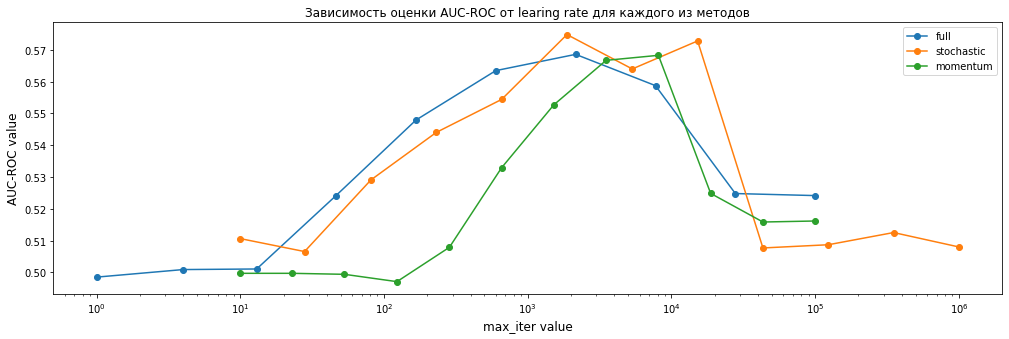

Зависимость оценки F-меры от max_iter для каждого из методов


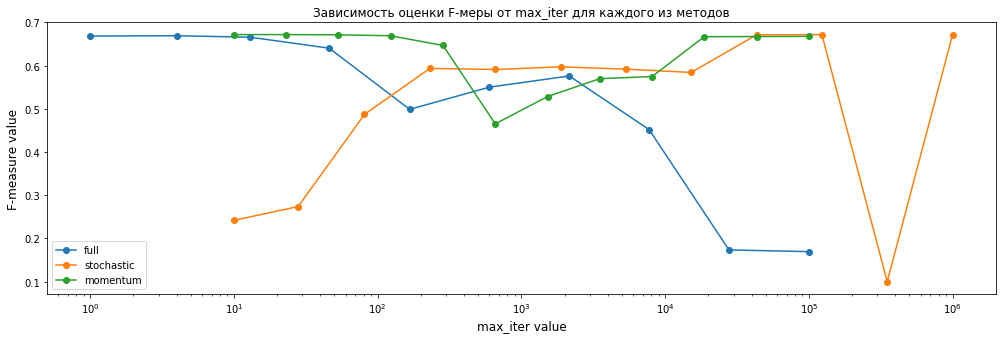

In [18]:
print('Зависимость оценки AUC-ROC от max_iter для каждого из методов')
plt.figure(figsize=(17, 5))
plt.plot(logspace_max_iter_full, aucroc_f1_max_iter_full.T[0], label='full', marker='o')
plt.plot(logspace_max_iter_st, aucroc_f1_max_iter_st.T[0], label='stochastic', marker='o')
plt.plot(logspace_max_iter_mm, aucroc_f1_max_iter_mm.T[0], label='momentum', marker='o')
plt.title('Зависимость оценки AUC-ROC от learing rate для каждого из методов')
plt.xlabel('max_iter value', fontsize=12)
plt.ylabel('AUC-ROC value', fontsize=12)
plt.xscale('log')
plt.legend(loc='best')
plt.show()

print('Зависимость оценки F-меры от max_iter для каждого из методов')
plt.figure(figsize=(17, 5))
plt.plot(logspace_max_iter_full, aucroc_f1_max_iter_full.T[1], label='full', marker='o')
plt.plot(logspace_max_iter_st, aucroc_f1_max_iter_st.T[1], label='stochastic', marker='o')
plt.plot(logspace_max_iter_mm, aucroc_f1_max_iter_mm.T[1], label='momentum', marker='o')
plt.title('Зависимость оценки F-меры от max_iter для каждого из методов')
plt.xlabel('max_iter value', fontsize=12)
plt.ylabel('F-measure value', fontsize=12)
plt.xscale('log')
plt.legend(loc='best')
plt.show()

**Выводы:** pass

**Задание 6 (1.5 балла)**. Постройте графики (на одной и той же картинке) зависимости величины функции потерь от номера итерации для полного, стохастического градиентного спусков, а также для полного градиентного спуска с методом Momentum. Постройте аналогичные графики для зависимости от времени работы в секундах. Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.

Назовём график *красивым*, если он соответствует требованиям, предъявленным к графикам в первом дз. В этом задании от вас требуются красивые графики.

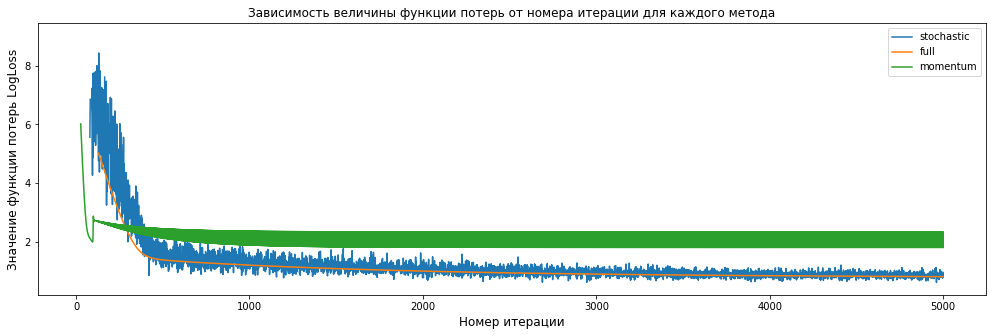

In [19]:
plt.figure(figsize=(17, 5))
plt.plot(lr_st.loss_history[:5000], label='stochastic')
plt.plot(lr_full.loss_history[:5000], label='full')
plt.plot(lr_mm.loss_history[:5000], label='momentum')
plt.title('Зависимость величины функции потерь от номера итерации для каждого метода')
plt.xlabel('Номер итерации', fontsize=12)
plt.ylabel('Значение функции потерь LogLoss', fontsize=12)
plt.legend(loc='best')
plt.show()

**Выводы:** pass

### Бонус

Бонусные задачи оцениваются особенно строго. Оценка может быть снижена за плохой код и даже за некрасивые названия переменных. Подсказок не даём.

**Задание 7 (0.5 баллов)**. Правда ли, что лог-лосс является выпуклой функцией относительно $w$? Правда ли, что она является Липшицевой относительно $w$? Почему?

**Задание 8 (3 балла)**. В этом задании на 2 балла засчитывается один из двух пунктов:
 * Реализуйте логистическую регрессию с лог-лоссом, обучаемую с помощью метода [Adam](https://arxiv.org/pdf/1412.6980.pdf)
 * Реализуйте логистическую регрессию с лог-лоссом, обучаемую с помощью [метода Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization)

добавьте при необходимости параметры в класс модели, повторите пункты 5 и 6 и сравните результаты.

На 3 балла засчитываются оба пункта со сравнением методов и выводами.

**Задание 9 (0.00 баллов)**.  Вставьте ниже самый смешной или самый грустный график, который получился у вас в этом дз.

## Часть 2: линейная регрессия и feature importance

В этой части мы проанализируем то, как работает линейная регрессия и регуляризация. Тут уже можно пользоваться sklearn'ом.

__Задание 9__ (0 баллов). Загрузите обучающие данные из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/data). Разделите выборку в отношении 7:3. Преобразуйте целевую переменную (trip_duration) как $\widetilde{y} = \log(1 + y)$. Удалите столбец id, а также столбцы, содержащие дату и время. Отнормируйте признаки при помощи MinMaxScaler'a. Как вы думаете, почему такое преобразование имеет смысл?

__Задание 10__ (1 балл). Обучите три вида линейной регрессии на получившихся данных: обычную, Ridge и Lasso. Оцените качество при помощи MSE и $R^2$. 


- Обычная -- без регуляризации $\lambda_1$ и $\lambda_2$ равны нулю;
- Ridge -- L2 регуляризация, то есть только $\lambda_1$ равна нулю;
- Lasso -- L1 регуляризация, то есть только $\lambda_2$ равна нулю;

__Задание 11__ (1 балл). Постройте графики зависимости значения метрик из предыдущего задания от значения коэффициента регуляризации для методов Lasso и Ridge. Какие выводы можно сделать?

Хорошие ли получились результаты?

__Задание 12__ (0.5 баллов). При помощи кросс-валидации найдите оптимальные значения коэффициента регуляризации для методов Ridge и Lasso.

__Задание 13__ (0.5 баллов). Постройте bar plot весов признаков для каждой из трёх моделей (на одном рисунке). Какие выводы можно сделать?

Какие фичи оказались наиболее важными? Согласуется ли это с вашими ожиданиями?

__Задание 14__ (2 балла). Добавьте в датасет дополнительные признаки, основываясь на существующих, чтобы получить значение метрики MSE не более 0.4. Что вы для этого сделали?